In [556]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

Params that won't change during simulation

In [557]:
k_on1 = 1e5
rho_T1 = 1e5
alpha = 3
k_off = 1e-4
q_on1 = 6.5e3
q_off = 4.7e-3
rho_N1 = 2.2e5
beta = 5 

rho_T = rho_T1/beta
rho_N = rho_N1/alpha
n_2 = k_off/q_off
delta = rho_T/rho_N
#N_r0 = 1
#T_r0 = 1

Set paramter regime and model

In [558]:
def model(t, z, n_1, v):

    dAdt = n_2*z[1] + (z[2]/delta) - v*(1 - z[2] - delta*z[3])*z[0] - n_1*(1 - z[1] - z[3])*z[0]
    dT_radt = n_1*(1 - z[1] - z[3])*z[0] + z[3] - n_2*z[1] - v*(1 - z[2] - delta*z[3])*z[1]
    dN_radt = delta*v*(1 - z[2] - delta*z[3])*z[0] + n_2*delta*z[3] - z[2] - n_1*(1 - z[1] - z[3])*z[2]
    dB_dt = (n_1/delta)*(1 - z[1] - z[3])*z[2] + v*(1 - z[2] - delta*z[3])*z[1] - (n_2 + 1)*z[3]
    dzdt = [dAdt, dT_radt, dN_radt, dB_dt]

    return dzdt

In [559]:
A0_array = [1e-12, 5e-12, 1e-11, 5e-11, 1e-10, 5e-10, 1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5]
IC_array = [0, 0.1, 0.6, 1]
A_st_array = []
T_st_array = []
N_st_array = []
B_st_array = []

# set sim params
t= np.geomspace(0.00000001, 100, 1000)
t_span = [0.00000001, 100]

for IC in IC_array:
    
    A_st = np.zeros(len(A0_array))
    T_st = np.zeros(len(A0_array))
    N_st = np.zeros(len(A0_array))
    B_st = np.zeros(len(A0_array))

    for i, A_01 in enumerate(A0_array):

        # new dimensional params
        k_on = k_on1*A_01
        q_on = q_on1*A_01

        # new dimensionless params
        A_0 = (172635*A_01*1.85e-18)/1.66e-24
        n_1 = k_on*rho_T*(1/q_off)
        v = q_on*(1/q_off)*rho_N
        z0 = [A_0/rho_T, IC, IC, 0]

        # solve system
        z = solve_ivp(model, t_span, z0, args=(n_1, v), method ='Radau', t_eval = t)

        # get last value 
        A = z.y[0]
        T = z.y[1]
        N = z.y[2]
        B = z.y[3]

        A_st[i] = A[-1]
        T_st[i] = T[-1]
        N_st[i] = N[-1]
        B_st[i] = B[-1]
    
    A_st_array.append(A_st)
    T_st_array.append(T_st)
    N_st_array.append(N_st)
    B_st_array.append(B_st)

[Text(0.5, 1.0, 'B')]

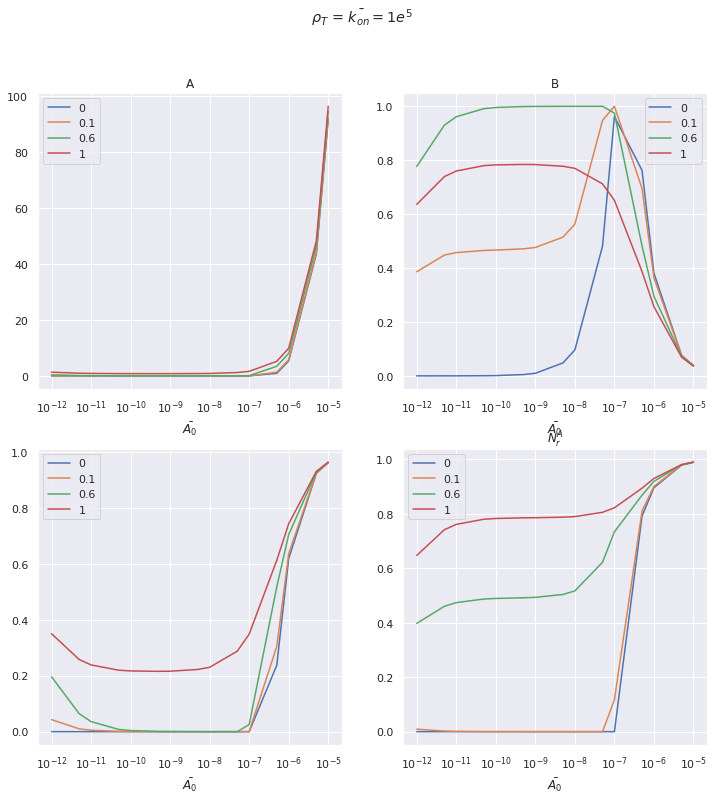

In [560]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.set_theme()
fig.suptitle(r'$\rho_T$ = $\bar{k_{on}} = 1e^5$')

for i in range(len(A_st_array)):
    A_i = A_st_array[i]
    T_i = T_st_array[i]
    N_i = N_st_array[i]
    B_i = B_st_array[i]

    axs[0][0].semilogx(A0_array, A_i, label = str(IC_array[i]))
    axs[1][0].semilogx(A0_array, T_i, label = str(IC_array[i]))
    axs[1][1].semilogx(A0_array, N_i, label = str(IC_array[i]))
    axs[0][1].semilogx(A0_array, B_i, label = str(IC_array[i]))
"""
axs[0][0].semilogx(A0_array, A_st, label = 'A')
axs[1][0].semilogx(A0_array, T_st, label = r'$T_r^A$')
axs[1][1].semilogx(A0_array, N_st, label = r'$N_r^A$')
axs[0][1].semilogx(A0_array, B_st, label = 'B')
axs[0][0].legend(loc = 'best')
axs[0][1].legend(loc = 'best')
axs[1][0].legend(loc = 'best')
axs[1][1].legend(loc = 'best')
axs[0][0].set(xlabel = r'$\bar{A_0}$')
axs[0][1].set(xlabel = r'$\bar{A_0}$')
axs[1][0].set(xlabel = r'$\bar{A_0}$')
axs[1][1].set(xlabel = r'$\bar{A_0}$')"""
axs[0][0].legend(loc = 'best')
axs[0][1].legend(loc = 'best')
axs[1][0].legend(loc = 'best')
axs[1][1].legend(loc = 'best')
axs[0][0].set(xlabel = r'$\bar{A_0}$')
axs[0][1].set(xlabel = r'$\bar{A_0}$')
axs[1][0].set(xlabel = r'$\bar{A_0}$')
axs[1][1].set(xlabel = r'$\bar{A_0}$')
axs[0][0].set(title = 'A')
axs[0][1].set(title = r'$T_r^A$')
axs[1][1].set(title = r'$N_r^A$')
axs[0][1].set(title = 'B')

In [561]:
A0_array = [1e-12, 5e-12, 1e-11, 5e-11, 1e-10, 5e-10, 1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5]
IC_array = np.linspace(0, 1, len(A0_array) )

# set sim params
t= np.geomspace(0.00000001, 100, 1000)
t_span = [0.00000001, 100]

A_st = np.zeros(len(A0_array))
T_st = np.zeros(len(A0_array))
N_st = np.zeros(len(A0_array))
B_st = np.zeros(len(A0_array))

for i, A_01 in enumerate(A0_array):

    # new dimensional params
    k_on = k_on1*A_01
    q_on = q_on1*A_01

    # new dimensionless params
    A_0 = (172635*A_01*1.85e-18)/1.66e-24
    n_1 = k_on*rho_T*(1/q_off)
    v = q_on*(1/q_off)*rho_N
    z0 = [A_0/rho_T, IC_array[i], 0.01*IC_array[i], 0]

    # solve system
    z = solve_ivp(model, t_span, z0, args=(n_1, v), method ='Radau', t_eval = t)

    # get last value 
    A = z.y[0]
    T = z.y[1]
    N = z.y[2]
    B = z.y[3]

    A_st[i] = A[-1]
    T_st[i] = T[-1]
    N_st[i] = N[-1]
    B_st[i] = B[-1]


[Text(0.5, 0, '$\\bar{A_0}$')]

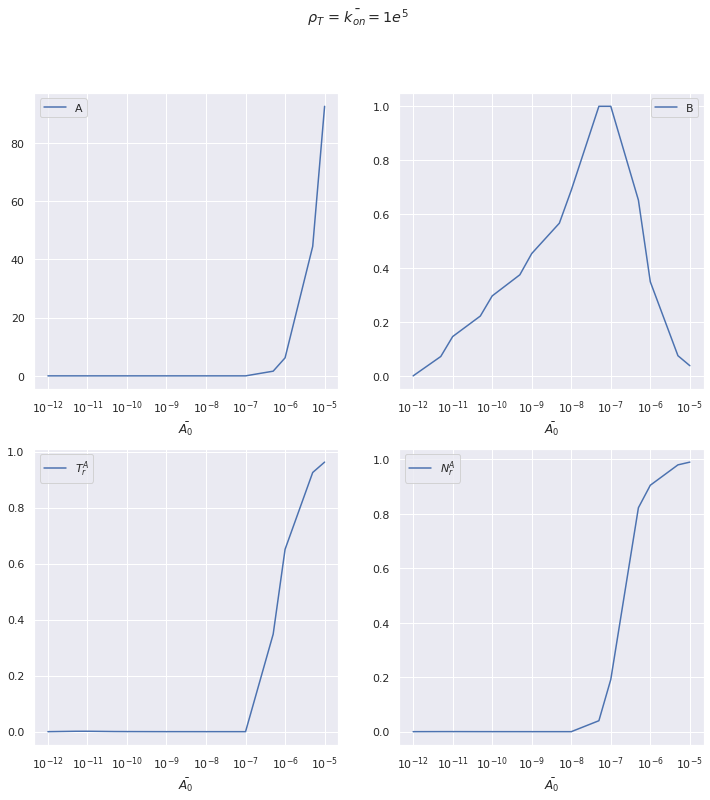

In [562]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.set_theme()
fig.suptitle(r'$\rho_T$ = $\bar{k_{on}} = 1e^5$')

axs[0][0].semilogx(A0_array, A_st, label = 'A')
axs[1][0].semilogx(A0_array, T_st, label = r'$T_r^A$')
axs[1][1].semilogx(A0_array, N_st, label = r'$N_r^A$')
axs[0][1].semilogx(A0_array, B_st, label = 'B')
axs[0][0].legend(loc = 'best')
axs[0][1].legend(loc = 'best')
axs[1][0].legend(loc = 'best')
axs[1][1].legend(loc = 'best')
axs[0][0].set(xlabel = r'$\bar{A_0}$')
axs[0][1].set(xlabel = r'$\bar{A_0}$')
axs[1][0].set(xlabel = r'$\bar{A_0}$')
axs[1][1].set(xlabel = r'$\bar{A_0}$')

In [563]:
def model_reduc(t, z):

    dT = (n_1*(1 - z[0] - z[2])*((mu_T) - z[0] - (z[1]/delta) - z[2])) + z[2] - (n_2*z[0]) -(v*(1 - z[1] - (delta*z[2]))*z[0])
    dN =(v*(1 - z[1] - (delta*z[2]))*((mu_N) - (delta*z[0]) - z[1] - (delta*z[2]))) + (n_2*delta*z[2]) - z[1] -(n_1*(1 - z[0] - z[2])*z[1])
    dB = ((n_1/delta)*(1 - z[0] - z[2])*z[1]) + (v*(1 - z[1] - (delta*z[2]))*z[0]) - ((n_2 + 1)*z[2])
    dz = [dT, dN, dB]

    return dz

In [564]:
A0_array = [1e-12, 5e-12, 1e-11, 5e-11, 1e-10, 5e-10, 1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5]
k_on1_array = [1e2, 1e3, 1e4, 1e5, 1e7]
IC_array = np.linspace(0, 1, len(A0_array) )

# set sim params
t= np.geomspace(0.00000001, 10000, 1000)
t_span = [0.00000001, 10000]

T_sols = []
N_sols = []
B_sols = []

for k_on1 in k_on1_array:
    T_st = np.zeros(len(A0_array))
    N_st = np.zeros(len(A0_array))
    B_st = np.zeros(len(A0_array))
    for i, A_01 in enumerate(A0_array):

        Nr0 = ((A_01/5e-7)**2)/(0.1**2 + (A_01/5e-7)**2)
        Tr0 = ((A_01/5e-7)**2)/(0.1**2 + (A_01/5e-7)**2)
        A_0 = (172635*A_01*1.85e-18)/1.66e-24
        k_on = k_on1*A_01
        q_on = q_on1*A_01
        rho_T = rho_T1/beta
        rho_N = rho_N1/alpha
        n_1 = k_on*rho_T*(1/q_off)
        n_2 = k_off/q_off
        v = q_on*(1/q_off)*rho_N
        delta = rho_T/rho_N
        Nr0 = 0#((A_01/4e-6)**2)/(0.0095**2 + (A_01/4e-6)**2)
        Tr0 = ((A_01/4e-6)**2)/(0.0095**2 + (A_01/4e-6)**2)
        C = A_0 + (Nr0*rho_N) + (Tr0*rho_T)
        mu_T = C/rho_T
        mu_N = C/rho_N
        z0 = [Tr0, Nr0, 0]

        # solve system
        z = solve_ivp(model_reduc, t_span, z0, method ='Radau', t_eval = t)

        # get last value 
        T = z.y[0]
        N = z.y[1]
        B = z.y[2]

        T_st[i] = T[-1]
        N_st[i] = N[-1]
        B_st[i] = B[-1]
    
    T_sols.append(T_st)
    N_sols.append(N_st)
    B_sols.append(B_st)


[Text(0.5, 1.0, '$B$')]

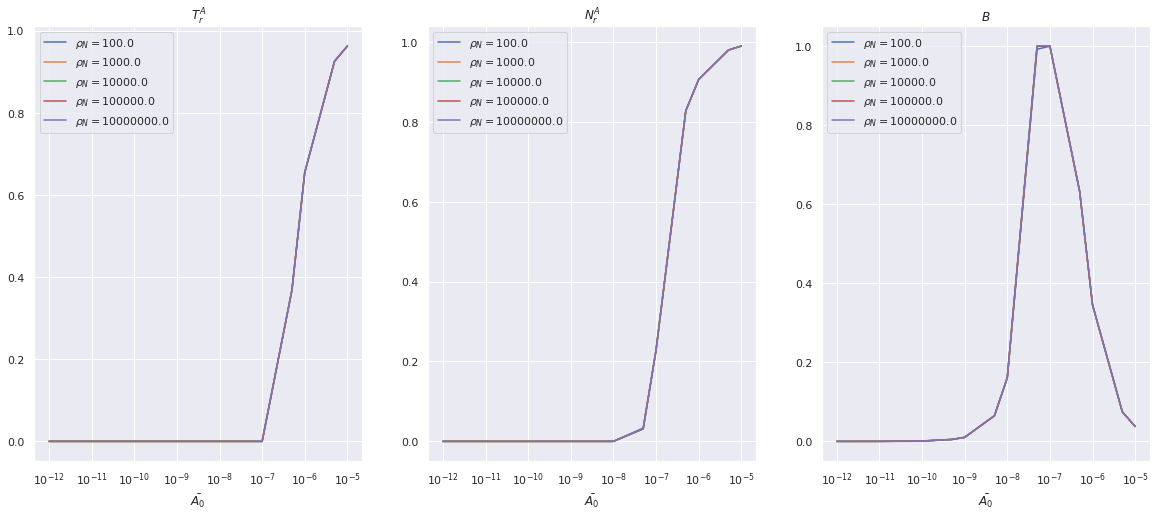

In [565]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

sns.set_theme()
#fig.suptitle(r'$\rho_T$ = $\bar{k_{on}} = 1e^5$')
 
for i, k_on1 in enumerate(k_on1_array):

    T_sts = T_sols[i]
    N_sts = N_sols[i]
    B_sts = B_sols[i]
    axs[0].semilogx(A0_array, T_sts, label = r'$\rho_{N} = $' + str(k_on1))
    axs[1].semilogx(A0_array, N_sts, label = r'$\rho_{N} = $' + str(k_on1))
    axs[2].semilogx(A0_array, B_sts, label = r'$\rho_{N} = $' + str(k_on1))
    
axs[0].legend(loc = 'best')
axs[1].legend(loc = 'best')
axs[2].legend(loc = 'best')
axs[0].set(xlabel = r'$\bar{A_0}$')
axs[1].set(xlabel = r'$\bar{A_0}$')
axs[2].set(xlabel = r'$\bar{A_0}$')
axs[0].set(title = r'$T_r^A$')
axs[1].set(title = r'$N_r^A$')
axs[2].set(title = r'$B$')

In [566]:
def T_steady_state(A_01):
    
    A_0 = ((172635*A_01*1.85e-18)/1.66e-24)/rho_T
    k_on = k_on1*A_01
    n_1 = k_on*rho_T*(1/q_off)
    
    return (1 + A_0 + (n_2/n_1) - np.sqrt((1 + A_0 + (n_2/n_1))**2 - 4*A_0))/2

In [567]:
def hill(x):
    x = x/4e-6
    return x**2/(0.0095**2 + x**2)


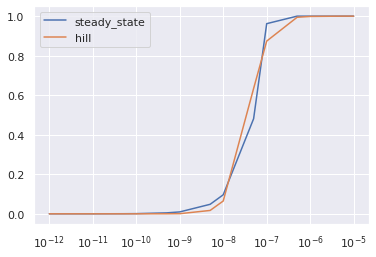

In [568]:
array1 = np.zeros(len(A0_array))
array2 = np.zeros(len(A0_array))
for i, elem in enumerate(A0_array):
    array1[i] = T_steady_state(elem)
    array2[i] = hill(elem)

plt.semilogx(A0_array, array1, label = 'steady_state')
plt.semilogx(A0_array, array2, label='hill')
plt.legend()
plt.show()

In [569]:
def N_steady_state(A_01):
    
    A_0 = ((172635*A_01*1.85e-18)/1.66e-24)/rho_T
    q_on = q_on1*A_01
    v = q_on*(1/q_off)*rho_T
    
    return (1 + A_0 + (1/v) - np.sqrt((1 + A_0 + (1/v))**2 - 4*A_0))/2

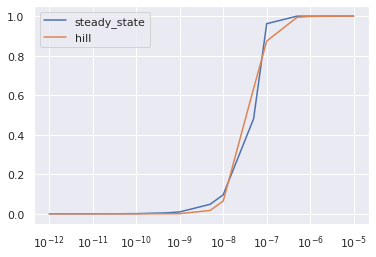

: 

In [570]:
array1 = np.zeros(len(A0_array))
array2 = np.zeros(len(A0_array))
for i, elem in enumerate(A0_array):
    array1[i] = N_steady_state(elem)
    array2[i] = hill(elem)

plt.semilogx(A0_array, array1, label = 'steady_state')
plt.semilogx(A0_array, array2, label='hill')
plt.legend()
plt.show()